<a href="https://www.kaggle.com/code/paveltitov2993/stones-analysis?scriptVersionId=119757713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rolling-stones-spotify-dataset/.cache
/kaggle/input/rolling-stones-spotify-dataset/rolling_stones_spotify.csv


Let's download our dataset and take a look at it.

In [2]:
ds = pd.read_csv('/kaggle/input/rolling-stones-spotify-dataset/rolling_stones_spotify.csv')
ds.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


Data preprocessing.

In [3]:
ds.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

We see that release_date has the 'object' format. Let's change it to datetime.

In [4]:
ds['release_date'] = pd.to_datetime(ds['release_date'])

In [5]:
ds.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


Overall, we have 1610 tracks in our dataset. Also .describe() method helps us estimate average charasteristics of the tracks, so even if we haven't heard about The Rolling Stones we can see what kind of music they generally do.
For example, the mean and median values for energy of all tracks are 0.79 and 0.85, pretty high. We can say that about loudness and tempo as well. So we understand that this is a band with energetic, fast and loud music, likely to be some kind of rock.

Let's check our data for duplicates and missing values.

In [6]:
ds.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
ds.duplicated().sum()

0

### Exploratory analysis

In [8]:
ds['album'].nunique()

90

I want to add the duration in seconds for every track and year of release for every album.

In [9]:
ds['duration_sec'] = ds['duration_ms'] / 1000.0
ds['release_year'] = ds['release_date'].dt.year
ds.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_sec,release_year
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,48.640,2022
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,253.173,2022
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,263.160,2022
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,305.880,2022
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,305.106,2022


In [10]:
ds.groupby('album').agg({'popularity': 'mean', 
                         'release_year': 'max'}).sort_values('popularity', ascending=False)

,popularity,release_year
album,,
Sticky Fingers (Remastered),53.300000,1971
Some Girls,48.100000,1978
Tattoo You (2009 Re-Mastered),46.454545,1981
Exile On Main Street (2010 Re-Mastered),44.166667,1972
Beggars Banquet (50th Anniversary Edition),43.700000,1968
...,...,...
On Air,3.722222,2017
Now!,3.666667,1965
Out Of Our Heads (UK Sequence),2.583333,1965


Above we see the list of albums sorted by the average rating of its songs. Table shows us that among top-5 albums 3 were released in the 70s. 
Their early albums are at the end of the list with lowest ratings, which is reasonable because not every band instantly becomes highly popular.

Let's illustrate distributions of the several columns.

Text(0.5, 1.0, 'Distribution of the duration of the songs')

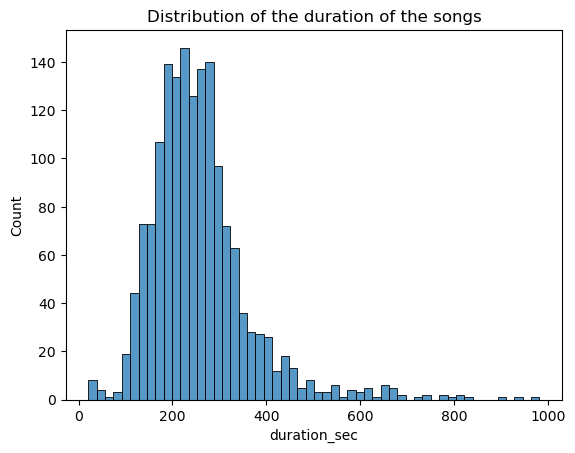

In [11]:
sns.histplot(ds['duration_sec'])
plt.title('Distribution of the duration of the songs')

This distribution is not normal, though the bell-shaped center looks similar. There is a long tail to the right, we see the existence of tracks almost 1000 seconds (over 16 minutes). I suppose that these tracks could be live ones, because live shows often include band introductions or long solos

Text(0.5, 1.0, 'Distribution of the popularity of the songs')

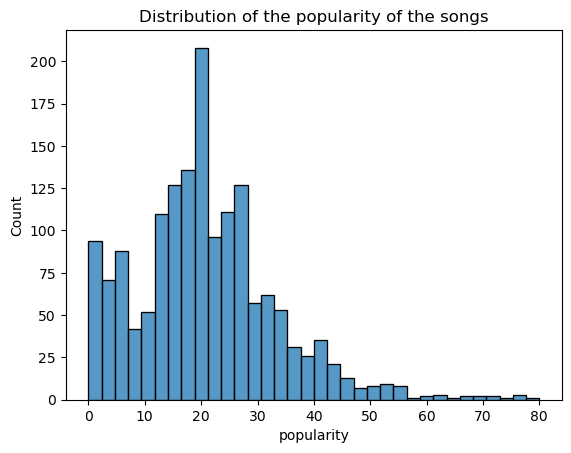

In [12]:
sns.histplot(ds['popularity'])
plt.title('Distribution of the popularity of the songs')

On the graph above we see a distribution with a definite peak - many songs have popularity rating around 20.

Now I want to examine the relation between different songs characteristics, for example:
1) loudness and danceability  
2) danceability and energy  
3) danceability and tempo

Scatter realtion plot is one of the best things for such cases.


Text(0.5, 1.0, 'Relation between danceability and loudness')

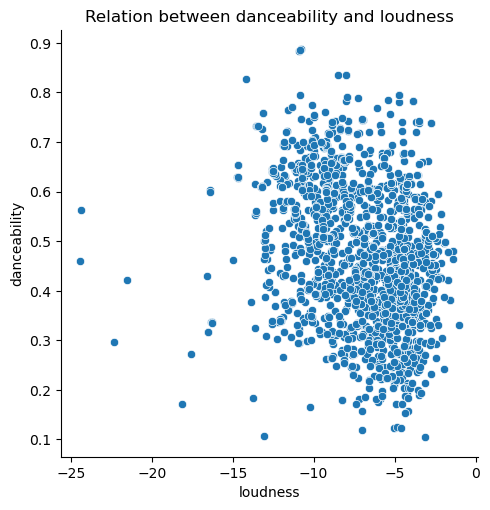

In [13]:
sns.relplot(data = ds, x='loudness', y='danceability')
plt.title('Relation between danceability and loudness')

Well, as I could expect the louder the song, the more danceable it is. But this works only to some extent,
most of the songs are approximately between -10 and -3 loudness values. So tracks become less danceable when their loudness reaches a specific value which is higher that comfortable value.

Text(0.5, 1.0, 'Relation between danceability and energy')

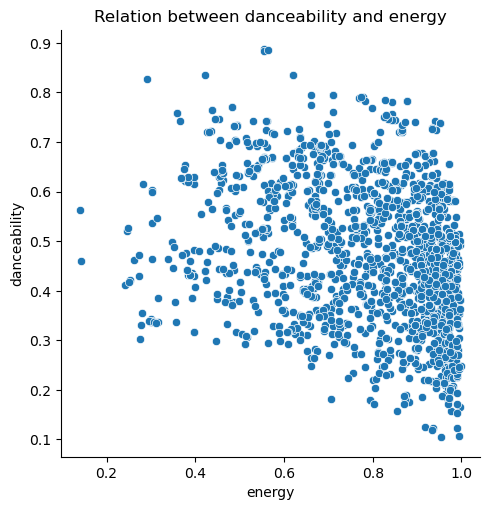

In [14]:
sns.relplot(data = ds, x='energy', y='danceability')
plt.title('Relation between danceability and energy')

Text(0.5, 1.0, 'Relation between danceability and tempo')

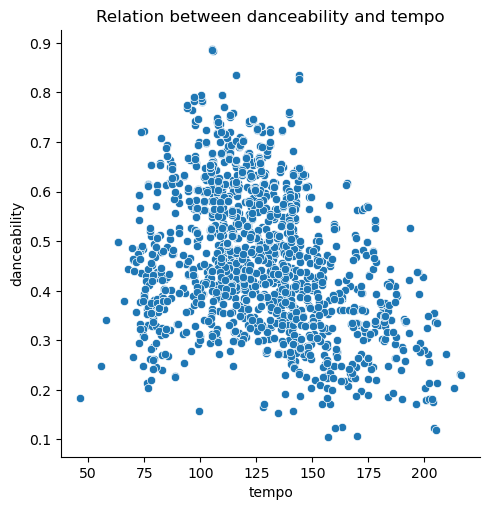

In [15]:
sns.relplot(data = ds, x='tempo', y='danceability')
plt.title('Relation between danceability and tempo')

We can see that in terms of dancing there is also a zone of comfortable tempo values.

Now let's make a pivot table where each row will correspond to an album and columns will represent the sum of characteristics of songs in this album.

In [16]:
albums_pivot = pd.pivot_table(data=ds, values=['popularity', 'danceability', 'acousticness'], index='album', aggfunc='sum')
albums_pivot.head()

,acousticness,danceability,popularity
album,,,
12 X 5,2.44632,5.878,385
12 x 5,2.45365,6.046,60
A Bigger Bang (2009 Re-Mastered),1.99520,8.874,433
A Bigger Bang (Live),8.75800,7.353,400
Aftermath,2.99097,6.536,474


I want to add the year of release to that table.

In [17]:
albums_pivot = albums_pivot.merge(ds.groupby('album')['release_year'].max(), on='album', how='left')
albums_pivot.head()


,acousticness,danceability,popularity,release_year
album,,,,
12 X 5,2.44632,5.878,385,1964
12 x 5,2.45365,6.046,60,1964
A Bigger Bang (2009 Re-Mastered),1.99520,8.874,433,2005
A Bigger Bang (Live),8.75800,7.353,400,2021
Aftermath,2.99097,6.536,474,1966


Then we can see what album was the most acoustic, danceable or popular.

In [18]:
display(
    albums_pivot.sort_values('popularity', ascending=False).head(),
    albums_pivot.sort_values('acousticness', ascending=False).head(),
    albums_pivot.sort_values('danceability', ascending=False).head()
)

,acousticness,danceability,popularity,release_year
album,,,,
Honk (Deluxe),9.671574,25.707,1232,2019
Tattoo You (Super Deluxe),11.012900,20.050,1008,2021
Goats Head Soup (Deluxe),6.662140,15.797,891,2020
Some Girls (Deluxe Version),13.816200,25.106,852,1978
Exile On Main Street (Deluxe Version),11.502060,12.521,839,1972


,acousticness,danceability,popularity,release_year
album,,,,
Voodoo Lounge Uncut (Live),16.43080,23.296,654,2018
Some Girls (Deluxe Version),13.81620,25.106,852,1978
Exile On Main Street (Bonus Track Version),11.50413,12.887,154,1972
Exile On Main Street (Deluxe Version),11.50206,12.521,839,1972
Tattoo You (Super Deluxe),11.01290,20.050,1008,2021


,acousticness,danceability,popularity,release_year
album,,,,
Honk (Deluxe),9.671574,25.707,1232,2019
Some Girls (Deluxe Version),13.816200,25.106,852,1978
Voodoo Lounge Uncut (Live),16.430800,23.296,654,2018
Tattoo You (Super Deluxe),11.012900,20.050,1008,2021
On Air (Deluxe),5.280310,17.024,573,2017


The most popular based on the sum is "Honk (Deluxe)". It was a big collection of the band's greatest hits, the most recognisable songs. So I guess the content explains the rating - most of the people who doesn't thoroughly know the Rolling Stones discography more likely use one album with all of the hits rather than search songs among multiple albums.

Next thing I want to do is divide the albums by decades and compare them.

In [19]:
ds['decade'] = ds['release_year'] - ds['release_year'] % 10
ds[['release_year', 'decade']].head()

,release_year,decade
0,2022,2020
1,2022,2020
2,2022,2020
3,2022,2020
4,2022,2020


In [20]:
ds['decade'].unique()

array([2020, 2010, 2000, 1990, 1980, 1970, 1960])

In [21]:
albums_aggregated = ds.groupby('album').agg(
    {'decade': 'max', 
     'release_year': 'max',
     'popularity': 'sum',
     'danceability': 'sum',
     'acousticness': 'sum'})

albums_by_decades = albums_aggregated.groupby('decade', as_index=False)[['popularity', 'danceability', 'acousticness']].mean()
albums_by_decades.head()

,decade,popularity,danceability,acousticness
0,1960,263.642857,7.285929,3.654048
1,1970,405.550000,8.161350,5.901932
2,1980,273.200000,5.882200,1.912273
3,1990,458.000000,10.002800,4.753726
4,2000,563.500000,12.462000,4.939600


Let's make it more visible with a bar plot.

Text(0.5, 1.0, 'Comparison of average albums popularity by decades')

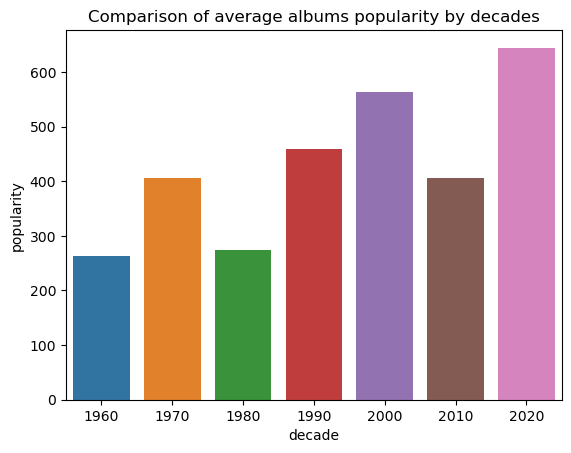

In [22]:
sns.barplot(data=albums_by_decades, x='decade', y='popularity')
plt.title('Comparison of average albums popularity by decades')

We see that 2020s is the decade with the most popular albums. Although all of the records released these years were remakes or deluxe versions of the earlier records, their last original album was released in 2005.  
So I want to compare only original records and one of my next steps will be separating them from the remakes.   
First of all I want to exclude live versions.

In [23]:
ds['live_factor'] = ds['name'].apply(lambda x: 'live' in x.lower())
ds[['name', 'live_factor']].head()

,name,live_factor
0,Concert Intro Music - Live,True
1,Street Fighting Man - Live,True
2,Start Me Up - Live,True
3,If You Can't Rock Me - Live,True
4,Don’t Stop - Live,True


Before comparing studio and live versions let's check that we separated them correctly.

In [24]:
ds[(ds['live_factor'] == False) & ('live' in ds['album'].str.lower())]

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_sec,release_year,decade,live_factor


Looks like we did everything fine.  
I want to compare some characteristics for studio and live versions to understand whether they are different or not, especially those parameters that could be affected py the presence of the crowd of people.

In [25]:
ds.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_sec,release_year,decade,live_factor
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,...,-12.913,0.1100,118.001,0.0302,33,48640,48.640,2022,2020,True
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,...,-4.803,0.0759,131.455,0.3180,34,253173,253.173,2022,2020,True
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,...,-4.936,0.1150,130.066,0.3130,34,263160,263.160,2022,2020,True
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,...,-5.535,0.1930,132.994,0.1470,32,305880,305.880,2022,2020,True
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,...,-5.098,0.0930,130.533,0.2060,32,305106,305.106,2022,2020,True


In [26]:
studio = ds[ds['live_factor'] == False]
lives = ds[ds['live_factor'] == True]

In [27]:
len(studio.groupby('album')['danceability'].sum())

62

In [28]:
len(lives.groupby('album')['danceability'].sum())

40

Above I calculated sum of danceability of each album - for studio and live versions and I needed to know their sizes. So if I'm about to test hypothesis, I should declare the following:

H0: Danceability of live and studio albums are the same.  
H1: Danceability of live and studio albums are different.

I want to use significance level 0.05.

I have two series with values of danceability and I want to perform a statistical test to discover whether they belong to the same distribution or not. To choose the correct test to use I should look at the distributions first.

In [29]:
s_1 = studio.groupby('album')['danceability'].sum()
s_2 = lives.groupby('album')['danceability'].sum()

Text(0.5, 1.0, 'live albums')

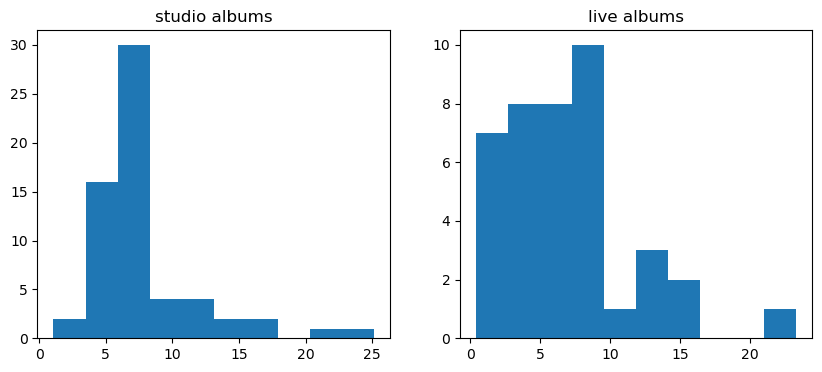

In [30]:
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(s_1)
ax[1].hist(s_2)
ax[0].set_title('studio albums')
ax[1].set_title('live albums')

We have small series and it is specifically recommended to use the t-test in that case. But this test requires that the sample means to be distriduted normally. So I will draw a sample from s_1 and s_2, calculate their means and repeat it for 1000 times. Let's see the sample means distribution.

Text(0.5, 1.0, 'live danceability sample means')

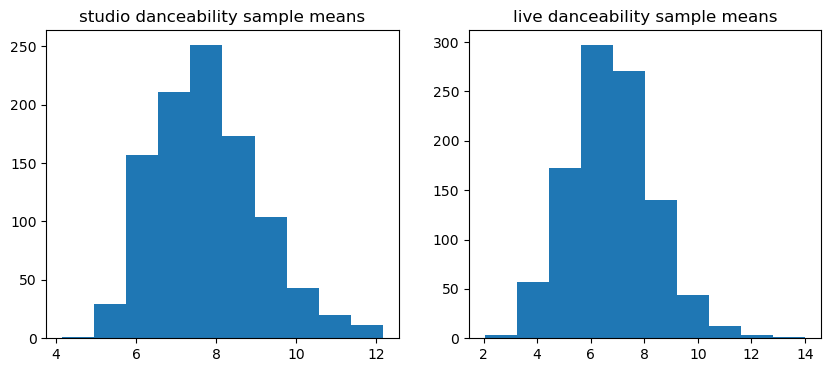

In [31]:
sr_1 = pd.Series([s_1.sample(n=10, replace=True).mean() for _ in range(1000)])
sr_2 = pd.Series([s_2.sample(n=10, replace=True).mean() for _ in range(1000)])
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(sr_1)
ax[1].hist(sr_2)
ax[0].set_title('studio danceability sample means')
ax[1].set_title('live danceability sample means')

We see that al least one sample mean distribution is not normal. So we can't use a t-test.  
But both distributions have a lot of non-uniformity. In that case we will use the Mann-Whitney U-test that doesn't require normal distribution of sample means. It takes two samples and tells us if they are from the same distribution or not.

In [32]:
st.mannwhitneyu(s_2, s_1)

MannwhitneyuResult(statistic=1093.0, pvalue=0.3153214389596519)

**Conclusion:** Given our input data, p-value is bigger that significance level value. So, at this point we can't reject null hypothesis H0.

Let's make similar test for other parameters like loudness and energy.  

H0: Loudness of live and studio albums are the same.  
H1: Loudness of live and studio albums are different.

Significance level is 0.05.

Text(0.5, 1.0, 'live albums loudness')

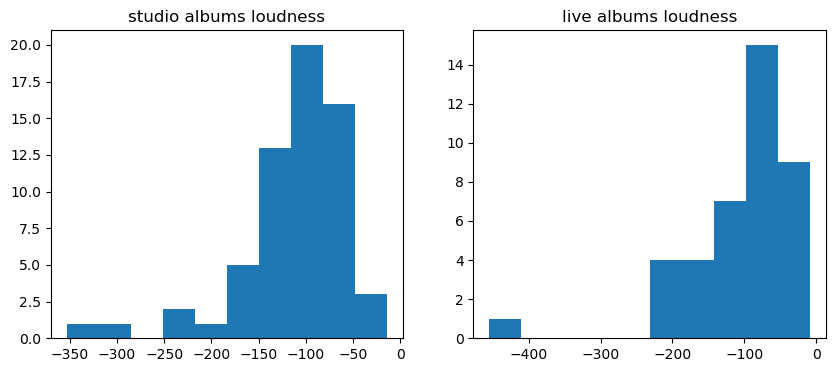

In [33]:
s_1 = studio.groupby('album')['loudness'].sum()
s_2 = lives.groupby('album')['loudness'].sum()
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(s_1)
ax[1].hist(s_2)
ax[0].set_title('studio albums loudness')
ax[1].set_title('live albums loudness')

In [34]:
st.mannwhitneyu(s_2, s_1)

MannwhitneyuResult(statistic=1299.0, pvalue=0.6884480683999278)

**Conclusion:** Given our input data, p-value is bigger that significance level value. So, at this point we can't reject null hypothesis H0.

H0: Energy of live and studio albums are the same.  
H1: Energy of live and studio albums are different.

Significance level is 0.05.

Text(0.5, 1.0, 'live albums energy')

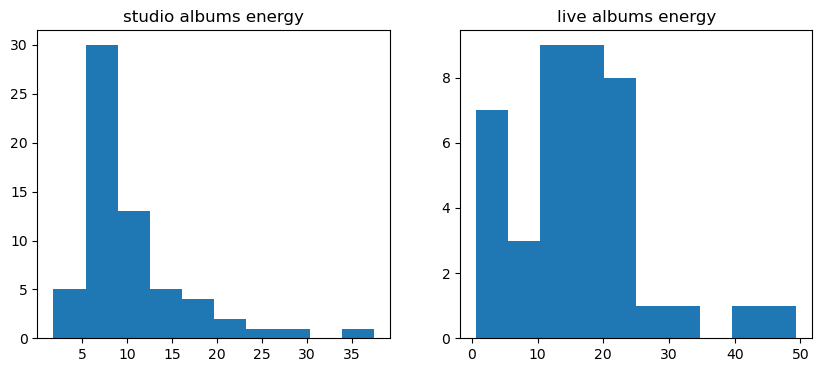

In [35]:
s_1 = studio.groupby('album')['energy'].sum()
s_2 = lives.groupby('album')['energy'].sum()
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(s_1)
ax[1].hist(s_2)
ax[0].set_title('studio albums energy')
ax[1].set_title('live albums energy')

In [36]:
st.mannwhitneyu(s_2, s_1)

MannwhitneyuResult(statistic=1707.0, pvalue=0.0013866513671259002)

**Conclusion:** Given our input data, the obtained p-value is less than our significance level. It means that there is statistically significant difference between energy of live and studio albums. Although, it is important to say, that so far we can't define the direction of this difference (bigger or smaller). We only discovered its presence.

Next I want to specify the direction of discovered difference. Is energy of the live albums bigger or smaller than studio?
For this I will do a one-tailed test.

H0: Energy of live albums is not bigger than of studio albums.  
H1: Energy of live albums is bigger than of studio albums.

Significance level is 0.05.

In [37]:
st.mannwhitneyu(s_2, s_1, alternative='greater')

MannwhitneyuResult(statistic=1707.0, pvalue=0.0006933256835629501)

**Conclusion:** We have a small p-value, so we can reject the null hypothesis. Our test showed that the mean energy of live albums is bigger than the energy of studio versions. Just as I expected, but now we have strong statistical evidence.